# 호출

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt
plt.rcParams['font.family'] ='Malgun Gothic'
plt.rcParams['axes.unicode_minus'] =False
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import shapiro, kstest
import scipy.stats as stats

# 1️⃣ CSV 파일 불러오기 (경로 변경 가능)
file_path = r"C:\Users\m\Desktop\변수 생성용 데이터\매출변수_20192.csv"
df = pd.read_csv(file_path, encoding="utf-8")

# 2️⃣ 확인할 변수 직접 입력
target_column = '프랜차이즈_변동성'  # ⚡ 여기에 확인할 컬럼명을 입력 ⚡

def plot_distribution(df, column):
    print(f"\n=== {column} 데이터 분포 확인 ===")

    # 컬럼이 존재하는지 확인
    if column not in df.columns:
        print(f"❌ 오류: {column} 컬럼이 데이터프레임에 없습니다.")
        return
    
    # 숫자로 변환 (에러 방지)
    df[column] = pd.to_numeric(df[column], errors='coerce')

    # 결측치 제거
    df = df.dropna(subset=[column])

    # 기초 통계량 출력
    print(df[column].describe())

    # 히스토그램 + KDE (밀도 그래프)
    plt.figure(figsize=(12, 5))

    plt.subplot(1, 2, 1)
    sns.histplot(df[column], bins=30, kde=True, color='royalblue')
    plt.title(f"{column} 히스토그램 & KDE")
    
    # 박스플롯 (이상치 확인용)
    plt.subplot(1, 2, 2)
    sns.boxplot(x=df[column], color='salmon')
    plt.title(f"{column} 박스플롯 (이상치 확인)")
    
    plt.show()

# 3️⃣ 데이터 분포 확인 실행
plot_distribution(df, target_column)

# 데이터 분포 확인

## 프랜차이즈_변동성 확인


=== 프랜차이즈_변동성 데이터 분포 확인 ===
count    31489.000000
mean         0.688930
std          0.976443
min          0.000000
25%          0.000000
50%          0.500000
75%          0.957427
max         15.628500
Name: 프랜차이즈_변동성, dtype: float64


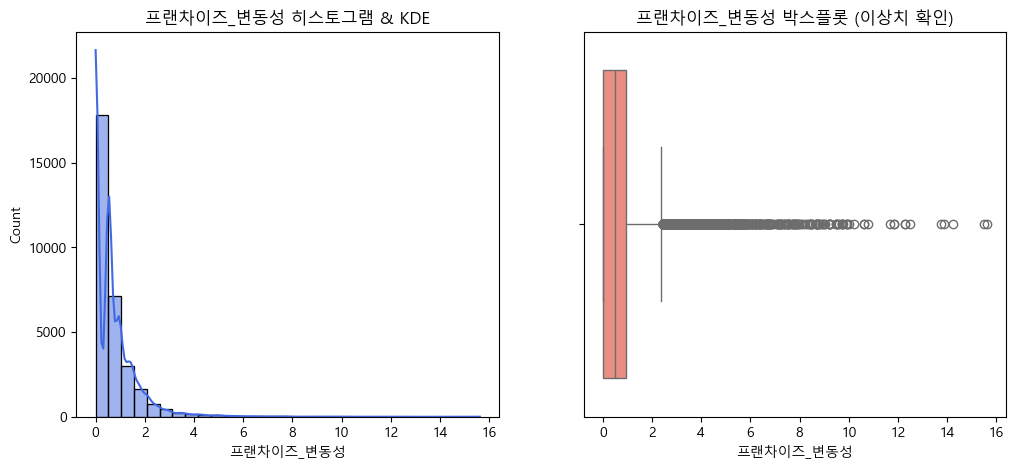

In [ ]:
# 1️⃣ CSV 파일 불러오기 (경로 변경 가능)
file_path = r"C:\Users\m\Desktop\변수 생성용 데이터\매출변수_20192.csv"
df = pd.read_csv(file_path, encoding="utf-8")

# 2️⃣ 확인할 변수 직접 입력
target_column = '프랜차이즈_변동성'  # ⚡ 여기에 확인할 컬럼명을 입력 ⚡

def plot_distribution(df, column):
    print(f"\n=== {column} 데이터 분포 확인 ===")

    # 컬럼이 존재하는지 확인
    if column not in df.columns:
        print(f"❌ 오류: {column} 컬럼이 데이터프레임에 없습니다.")
        return
    
    # 숫자로 변환 (에러 방지)
    df[column] = pd.to_numeric(df[column], errors='coerce')

    # 결측치 제거
    df = df.dropna(subset=[column])

    # 기초 통계량 출력
    print(df[column].describe())

    # 히스토그램 + KDE (밀도 그래프)
    plt.figure(figsize=(12, 5))

    plt.subplot(1, 2, 1)
    sns.histplot(df[column], bins=30, kde=True, color='royalblue')
    plt.title(f"{column} 히스토그램 & KDE")
    
    # 박스플롯 (이상치 확인용)
    plt.subplot(1, 2, 2)
    sns.boxplot(x=df[column], color='salmon')
    plt.title(f"{column} 박스플롯 (이상치 확인)")
    
    plt.show()

# 3️⃣ 데이터 분포 확인 실행
plot_distribution(df, target_column)

분포의 왜곡 (Skewness)
히스토그램과 KDE(밀도곡선)에서 대부분의 값이 왼쪽(0 근처)에 몰려 있고, 긴 꼬리가 오른쪽으로 이어짐.
이런 경우 로그 변환(log) 또는 Box-Cox 변환을 고려

In [7]:
import pandas as pd
import numpy as np

# 파일 경로 설정
input_file_path = r"C:\Users\m\Desktop\변수 생성용 데이터\매출변수_20192.csv"
output_file_path = r"C:\Users\m\Desktop\변수 생성용 데이터\매출변수_20192_이상치제거.csv"

# CSV 불러오기
df = pd.read_csv(input_file_path, encoding="utf-8")

def replace_outliers_with_bounds(df, column):
    """
    IQR 기반 이상치를 최솟값(Q1 - 1.5*IQR)과 최댓값(Q3 + 1.5*IQR)으로 대체
    """
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR  # 하한
    upper_bound = Q3 + 1.5 * IQR  # 상한

    # 이상치 판별
    lower_outliers = df[column] < lower_bound
    upper_outliers = df[column] > upper_bound
    print(f"🔍 {column} 이상치 개수: 하한 {lower_outliers.sum()}개, 상한 {upper_outliers.sum()}개")

    # 이상치를 최솟값 또는 최댓값으로 대체
    df[column] = np.where(lower_outliers, lower_bound, df[column])
    df[column] = np.where(upper_outliers, upper_bound, df[column])

    return df

# 적용할 컬럼 리스트 (여러 개 지정 가능)
columns_to_process = ['프랜차이즈_변동성']

# 각 컬럼별 이상치 처리
for col in columns_to_process:
    df = replace_outliers_with_bounds(df, col)

# 수정된 데이터 저장
df.to_csv(output_file_path, index=False, encoding="utf-8")

print(f"✅ 이상치 처리 완료! 파일 저장: {output_file_path}")

🔍 프랜차이즈_변동성 이상치 개수: 하한 0개, 상한 1391개
✅ 이상치 처리 완료! 파일 저장: C:\Users\m\Desktop\변수 생성용 데이터\매출변수_20192_이상치제거.csv



=== 프랜차이즈_변동성 데이터 분포 확인 ===
count    31489.000000
mean         0.622712
std          0.698164
min          0.000000
25%          0.000000
50%          0.500000
75%          0.957427
max          2.393568
Name: 프랜차이즈_변동성, dtype: float64


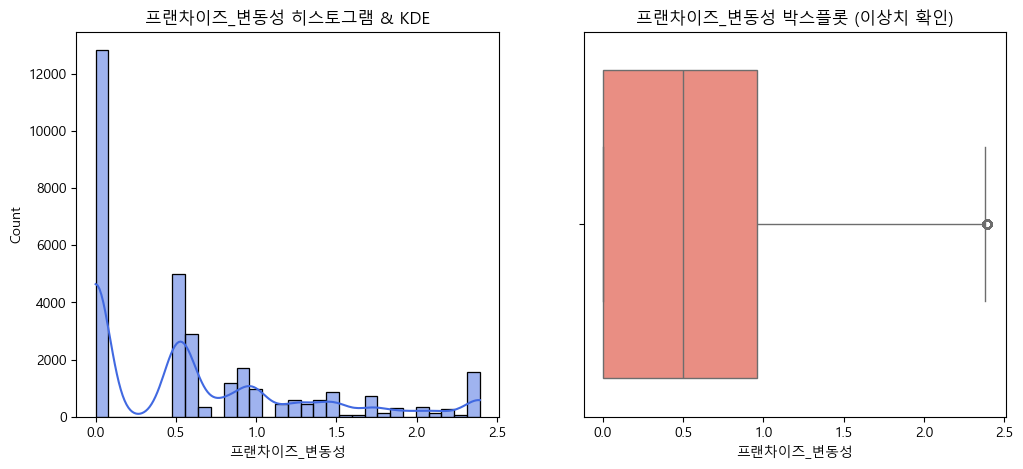

In [10]:
# 1️⃣ CSV 파일 불러오기 (경로 변경 가능)
file_path = r"C:\Users\m\Desktop\변수 생성용 데이터\매출변수_20192_이상치제거.csv"
df = pd.read_csv(file_path, encoding="utf-8")

# 2️⃣ 확인할 변수 직접 입력
target_column = '프랜차이즈_변동성'  # ⚡ 여기에 확인할 컬럼명을 입력 ⚡

def plot_distribution(df, column):
    print(f"\n=== {column} 데이터 분포 확인 ===")

    # 컬럼이 존재하는지 확인
    if column not in df.columns:
        print(f"❌ 오류: {column} 컬럼이 데이터프레임에 없습니다.")
        return
    
    # 숫자로 변환 (에러 방지)
    df[column] = pd.to_numeric(df[column], errors='coerce')

    # 결측치 제거
    df = df.dropna(subset=[column])

    # 기초 통계량 출력
    print(df[column].describe())

    # 히스토그램 + KDE (밀도 그래프)
    plt.figure(figsize=(12, 5))

    plt.subplot(1, 2, 1)
    sns.histplot(df[column], bins=30, kde=True, color='royalblue')
    plt.title(f"{column} 히스토그램 & KDE")
    
    # 박스플롯 (이상치 확인용)
    plt.subplot(1, 2, 2)
    sns.boxplot(x=df[column], color='salmon')
    plt.title(f"{column} 박스플롯 (이상치 확인)")
    
    plt.show()

# 3️⃣ 데이터 분포 확인 실행
plot_distribution(df, target_column)

## 5년생존률 확인


=== 5년생존률 데이터 분포 확인 ===
count    31413.000000
mean        46.696737
std         16.605743
min          0.000000
25%         36.700000
50%         45.500000
75%         55.600000
max        100.000000
Name: 5년생존률, dtype: float64


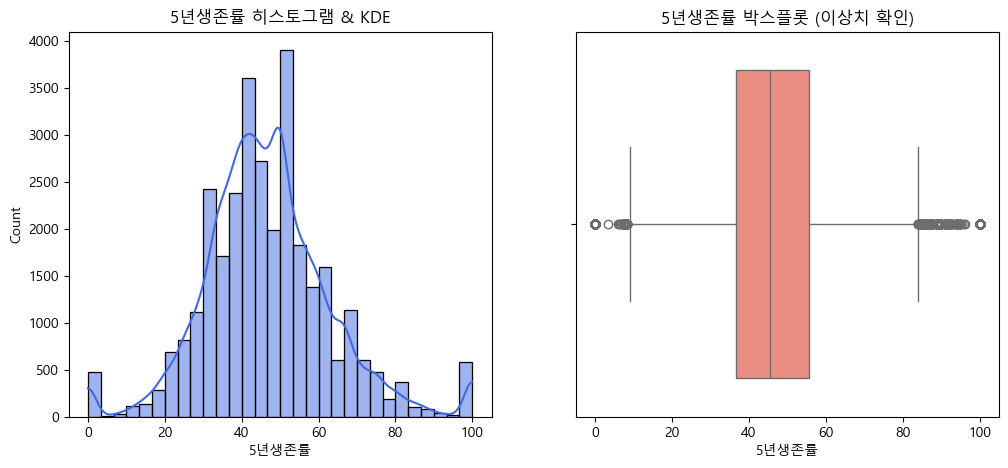

In [12]:
# 1️⃣ CSV 파일 불러오기 (경로 변경 가능)
file_path = r"C:\Users\m\Desktop\변수 생성용 데이터\매출변수_20192.csv"
df = pd.read_csv(file_path, encoding="utf-8")

# 2️⃣ 확인할 변수 직접 입력
target_column = '5년생존률'  # ⚡ 여기에 확인할 컬럼명을 입력 ⚡

def plot_distribution(df, column):
    print(f"\n=== {column} 데이터 분포 확인 ===")

    # 컬럼이 존재하는지 확인
    if column not in df.columns:
        print(f"❌ 오류: {column} 컬럼이 데이터프레임에 없습니다.")
        return
    
    # 숫자로 변환 (에러 방지)
    df[column] = pd.to_numeric(df[column], errors='coerce')

    # 결측치 제거
    df = df.dropna(subset=[column])

    # 기초 통계량 출력
    print(df[column].describe())

    # 히스토그램 + KDE (밀도 그래프)
    plt.figure(figsize=(12, 5))

    plt.subplot(1, 2, 1)
    sns.histplot(df[column], bins=30, kde=True, color='royalblue')
    plt.title(f"{column} 히스토그램 & KDE")
    
    # 박스플롯 (이상치 확인용)
    plt.subplot(1, 2, 2)
    sns.boxplot(x=df[column], color='salmon')
    plt.title(f"{column} 박스플롯 (이상치 확인)")
    
    plt.show()

# 3️⃣ 데이터 분포 확인 실행
plot_distribution(df, target_column)

### 이상치 대체

In [ ]:
# 파일 경로 설정
input_file_path = r"C:\Users\m\Desktop\변수 생성용 데이터\매출변수_20192.csv"
output_file_path = r"C:\Users\m\Desktop\변수 생성용 데이터\매출변수_20192_5년생존률수정.csv"

# CSV 불러오기
df = pd.read_csv(input_file_path, encoding="utf-8")

def replace_outliers_with_bounds(df, column):
    """
    IQR 기반 이상치를 최솟값(Q1 - 1.5*IQR)과 최댓값(Q3 + 1.5*IQR)으로 대체
    """
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR  # 하한
    upper_bound = Q3 + 1.5 * IQR  # 상한

    # 이상치 판별
    lower_outliers = df[column] < lower_bound
    upper_outliers = df[column] > upper_bound
    print(f"🔍 {column} 이상치 개수: 하한 {lower_outliers.sum()}개, 상한 {upper_outliers.sum()}개")

    # 이상치를 최솟값 또는 최댓값으로 대체
    df[column] = np.where(lower_outliers, lower_bound, df[column])
    df[column] = np.where(upper_outliers, upper_bound, df[column])

    return df

# 적용할 컬럼 리스트 (여러 개 지정 가능)
columns_to_process = ['5년생존률']

# 각 컬럼별 이상치 처리
for col in columns_to_process:
    df = replace_outliers_with_bounds(df, col)

# 수정된 데이터 저장
df.to_csv(output_file_path, index=False, encoding="utf-8")

print(f"✅ 이상치 처리 완료! 파일 저장: {output_file_path}")

🔍 5년생존률 이상치 개수: 하한 505개, 상한 826개
✅ 이상치 처리 완료! 파일 저장: C:\Users\m\Desktop\변수 생성용 데이터\매출변수_20192_5년생존률수정정.csv


### 확인


=== 5년생존률 데이터 분포 확인 ===
count    31413.000000
mean        46.496506
std         15.347080
min          8.350000
25%         36.700000
50%         45.500000
75%         55.600000
max         83.950000
Name: 5년생존률, dtype: float64


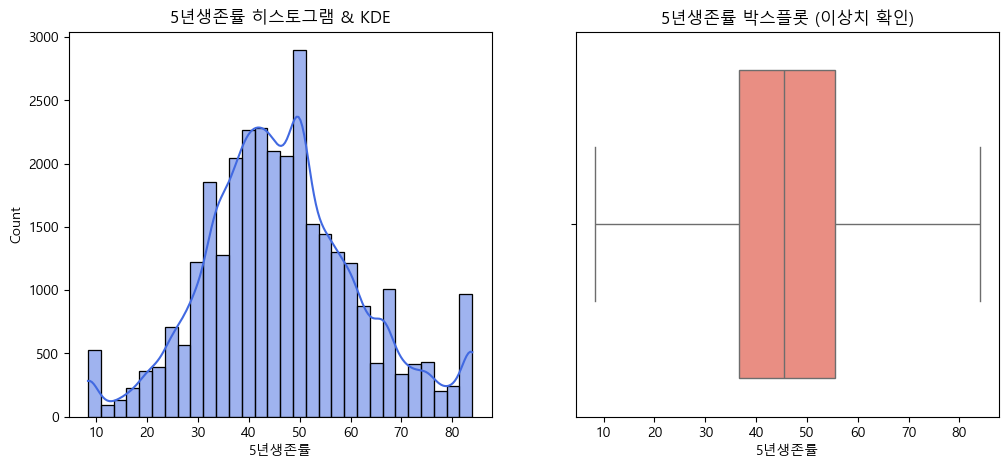

In [15]:
# 1️⃣ CSV 파일 불러오기 (경로 변경 가능)
file_path = r"C:\Users\m\Desktop\변수 생성용 데이터\매출변수_20192_5년생존률수정.csv"
df = pd.read_csv(file_path, encoding="utf-8")

# 2️⃣ 확인할 변수 직접 입력
target_column = '5년생존률'  # ⚡ 여기에 확인할 컬럼명을 입력 ⚡

def plot_distribution(df, column):
    print(f"\n=== {column} 데이터 분포 확인 ===")

    # 컬럼이 존재하는지 확인
    if column not in df.columns:
        print(f"❌ 오류: {column} 컬럼이 데이터프레임에 없습니다.")
        return
    
    # 숫자로 변환 (에러 방지)
    df[column] = pd.to_numeric(df[column], errors='coerce')

    # 결측치 제거
    df = df.dropna(subset=[column])

    # 기초 통계량 출력
    print(df[column].describe())

    # 히스토그램 + KDE (밀도 그래프)
    plt.figure(figsize=(12, 5))

    plt.subplot(1, 2, 1)
    sns.histplot(df[column], bins=30, kde=True, color='royalblue')
    plt.title(f"{column} 히스토그램 & KDE")
    
    # 박스플롯 (이상치 확인용)
    plt.subplot(1, 2, 2)
    sns.boxplot(x=df[column], color='salmon')
    plt.title(f"{column} 박스플롯 (이상치 확인)")
    
    plt.show()

# 3️⃣ 데이터 분포 확인 실행
plot_distribution(df, target_column)

## 5년생존률 수정 -이상치 제거

In [ ]:
# 파일 경로 설정
input_file_path = r"C:\Users\m\Desktop\변수 생성용 데이터\매출변수_20192.csv"
output_file_path = r"C:\Users\m\Desktop\변수 생성용 데이터\매출변수_20192_5년생존률수정.csv"

# CSV 불러오기
df = pd.read_csv(input_file_path, encoding="utf-8")

def remove_outliers(df, column):
    """
    IQR 기반 이상치를 삭제하는 함수
    """
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR  # 하한
    upper_bound = Q3 + 1.5 * IQR  # 상한

    # 이상치 판별
    outliers = (df[column] < lower_bound) | (df[column] > upper_bound)
    print(f"🔍 {column} 이상치 개수: {outliers.sum()}개 삭제")
    
    # 이상치가 아닌 값만 남김
    return df[~outliers]

# 적용할 컬럼 리스트
columns_to_process = ['5년생존률']

# 각 컬럼별 이상치 제거
for col in columns_to_process:
    df = remove_outliers(df, col)

# 수정된 데이터 저장
df.to_csv(output_file_path, index=False, encoding="utf-8")

print(f"✅ 이상치 삭제 완료! 파일 저장: {output_file_path}")

🔍 5년생존률 이상치 개수: 1331개 삭제
✅ 이상치 삭제 완료! 파일 저장: C:\Users\m\Desktop\변수 생성용 데이터\매출변수_20192_5년생존률수정.csv



=== 5년생존률 데이터 분포 확인 ===
count    30082.000000
mean        46.108480
std         13.522426
min          9.100000
25%         37.000000
50%         45.500000
75%         54.500000
max         83.900000
Name: 5년생존률, dtype: float64


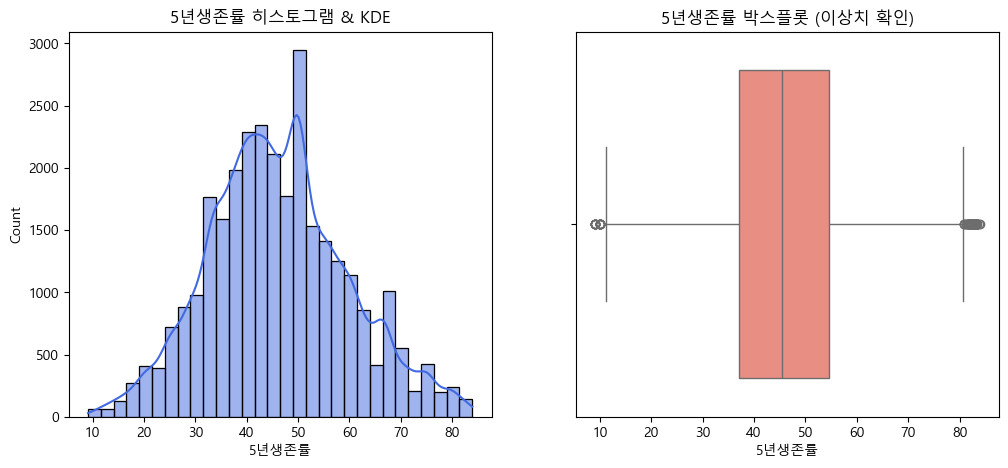

In [17]:
# 1️⃣ CSV 파일 불러오기 (경로 변경 가능)
file_path = r"C:\Users\m\Desktop\변수 생성용 데이터\매출변수_20192_5년생존률수정.csv"
df = pd.read_csv(file_path, encoding="utf-8")

# 2️⃣ 확인할 변수 직접 입력
target_column = '5년생존률'  # ⚡ 여기에 확인할 컬럼명을 입력 ⚡

def plot_distribution(df, column):
    print(f"\n=== {column} 데이터 분포 확인 ===")

    # 컬럼이 존재하는지 확인
    if column not in df.columns:
        print(f"❌ 오류: {column} 컬럼이 데이터프레임에 없습니다.")
        return
    
    # 숫자로 변환 (에러 방지)
    df[column] = pd.to_numeric(df[column], errors='coerce')

    # 결측치 제거
    df = df.dropna(subset=[column])

    # 기초 통계량 출력
    print(df[column].describe())

    # 히스토그램 + KDE (밀도 그래프)
    plt.figure(figsize=(12, 5))

    plt.subplot(1, 2, 1)
    sns.histplot(df[column], bins=30, kde=True, color='royalblue')
    plt.title(f"{column} 히스토그램 & KDE")
    
    # 박스플롯 (이상치 확인용)
    plt.subplot(1, 2, 2)
    sns.boxplot(x=df[column], color='salmon')
    plt.title(f"{column} 박스플롯 (이상치 확인)")
    
    plt.show()

# 3️⃣ 데이터 분포 확인 실행
plot_distribution(df, target_column)

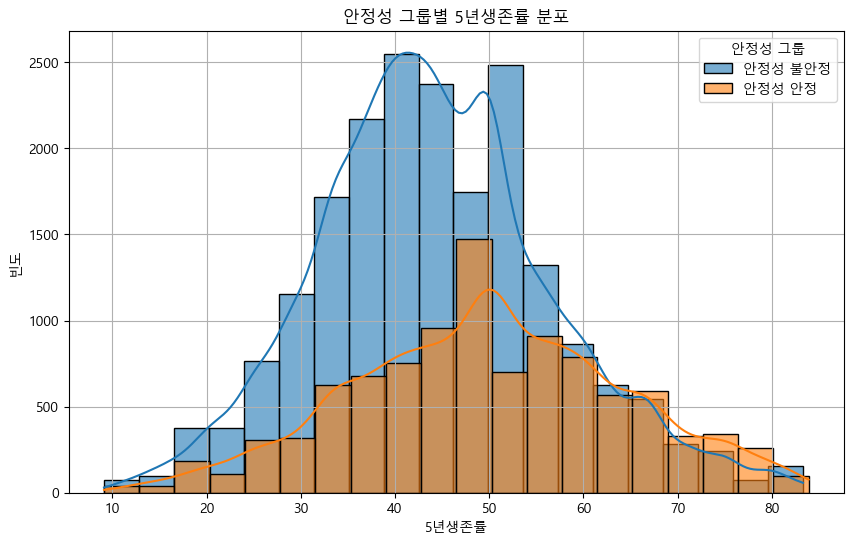

In [18]:
# CSV 파일 불러오기
file_path = r"C:\Users\m\Desktop\변수 생성용 데이터\매출변수_20192_5년생존률수정.csv"
df = pd.read_csv(file_path, encoding="utf-8")

# 안정성 컬럼의 고유값 가져오기
unique_values = df["안정성"].unique()

# 히스토그램 시각화
plt.figure(figsize=(10, 6))
for value in unique_values:
    subset = df[df["안정성"] == value]  # 특정 안정성 그룹의 데이터 필터링
    sns.histplot(subset["5년생존률"], label=f"안정성 {value}", kde=True, bins=20, alpha=0.6)

# 그래프 설정
plt.xlabel("5년생존률")
plt.ylabel("빈도")
plt.title("안정성 그룹별 5년생존률 분포")
plt.legend(title="안정성 그룹")
plt.grid(True)
plt.show()

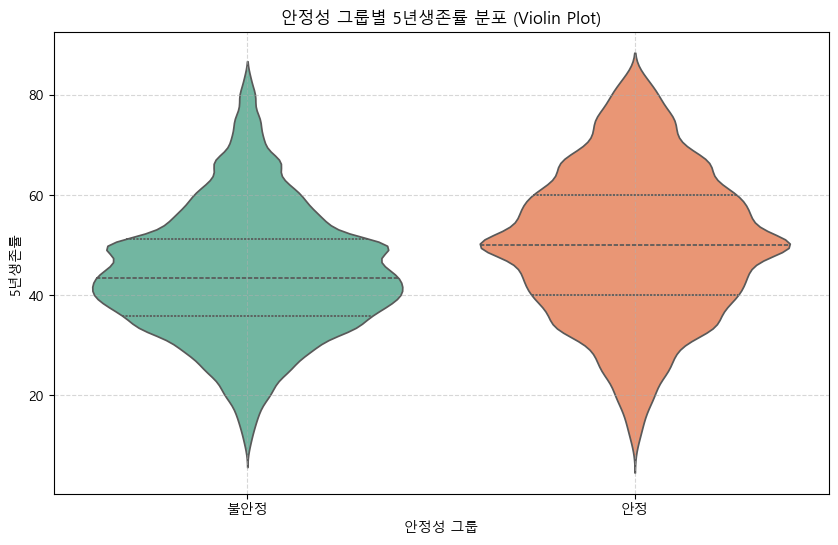

In [ ]:
# CSV 파일 불러오기
file_path = r"C:\Users\m\Desktop\변수 생성용 데이터\매출변수_20192_5년생존률수정.csv"
df = pd.read_csv(file_path, encoding="utf-8")

# 그래프 스타일 설정
plt.figure(figsize=(10, 6))
sns.violinplot(x="안정성", y="5년생존률", hue="안정성", data=df, palette="Set2", inner="quartile", dodge=False, legend=False)

# 그래프 설정
plt.xlabel("안정성 그룹")
plt.ylabel("5년생존률")
plt.title("안정성 그룹별 5년생존률 분포 (Violin Plot)")
plt.grid(True, linestyle="--", alpha=0.5)

# 그래프 출력
plt.show()

C:\Users\m\AppData\Local\Temp\ipykernel_8900\1203688928.py:11: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  sampled_df = df.groupby("안정성", group_keys=False).apply(lambda x: x.sample(n=1000, replace=True) if len(x) >= 1000 else x)
C:\Users\m\AppData\Local\Temp\ipykernel_8900\1203688928.py:35: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x="안정성", y="5년생존률", data=sampled_df, palette="Set2", inner="quartile", ax=axes[2])


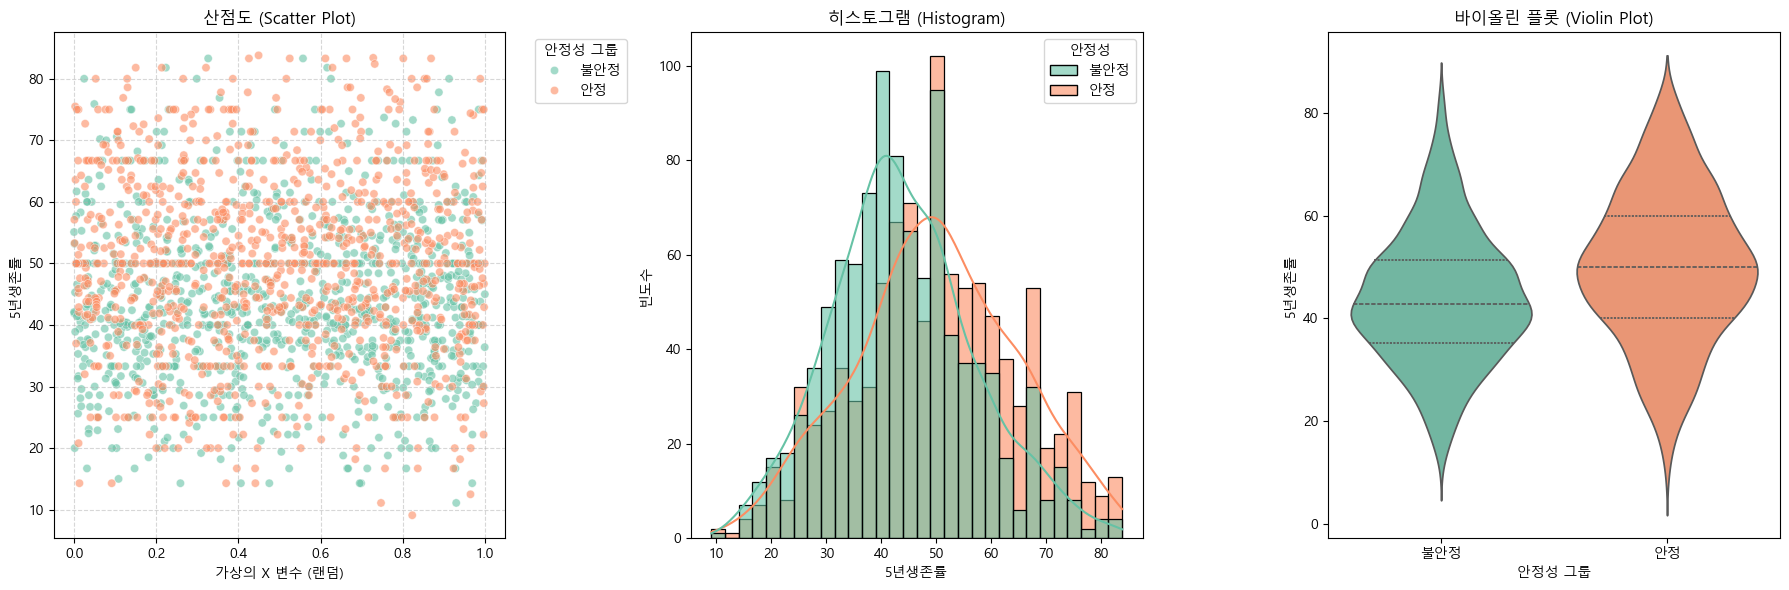

In [ ]:
# CSV 파일 불러오기
file_path = r"C:\Users\m\Desktop\변수 생성용 데이터\매출변수_20192_5년생존률수정.csv"
df = pd.read_csv(file_path, encoding="utf-8")

# 안정성 그룹별 1000개씩 샘플링 (샘플링 후 인덱스 초기화)
sampled_df = df.groupby("안정성", group_keys=False).apply(lambda x: x.sample(n=1000, replace=True) if len(x) >= 1000 else x)
sampled_df = sampled_df.reset_index(drop=True)  # 인덱스 초기화

# 가상의 X축 변수 추가 (0~1 사이의 랜덤 값)
sampled_df["x_random"] = np.random.rand(len(sampled_df))

# 그래프 설정
fig, axes = plt.subplots(1, 3, figsize=(18, 6))  # 1행 3열

# 1. 산점도 (Scatter Plot)
sns.scatterplot(x="x_random", y="5년생존률", hue="안정성", data=sampled_df, palette="Set2", alpha=0.6, ax=axes[0])
axes[0].set_xlabel("가상의 X 변수 (랜덤)")
axes[0].set_ylabel("5년생존률")
axes[0].set_title("산점도 (Scatter Plot)")
axes[0].legend(title="안정성 그룹", bbox_to_anchor=(1.05, 1), loc="upper left")
axes[0].grid(True, linestyle="--", alpha=0.5)

# 2. 히스토그램 (Histogram)
sns.histplot(data=sampled_df, x="5년생존률", hue="안정성", palette="Set2", kde=True, bins=30, alpha=0.6, ax=axes[1])
axes[1].set_xlabel("5년생존률")
axes[1].set_ylabel("빈도수")
axes[1].set_title("히스토그램 (Histogram)")

# 3. 바이올린 플롯 (Violin Plot)
sns.violinplot(x="안정성", y="5년생존률", data=sampled_df, palette="Set2", inner="quartile", ax=axes[2])
axes[2].set_xlabel("안정성 그룹")
axes[2].set_ylabel("5년생존률")
axes[2].set_title("바이올린 플롯 (Violin Plot)")

# 레이아웃 조정
plt.tight_layout()
plt.show()

- 통계검정

In [ ]:
# CSV 파일 불러오기
file_path = r"C:\Users\m\Desktop\변수 생성용 데이터\매출변수_20192_5년생존률수정.csv"
df = pd.read_csv(file_path, encoding="utf-8")

# 안정성 그룹별 1000개씩 샘플링
sampled_df = df.groupby("안정성", group_keys=False).apply(lambda x: x.sample(n=1000, replace=True) if len(x) >= 1000 else x)
sampled_df = sampled_df.reset_index(drop=True)

# 정규성 검정 실행
results = []
for stability_group in sampled_df["안정성"].unique():
    data = sampled_df[sampled_df["안정성"] == stability_group]["5년생존률"].dropna()

    # Shapiro-Wilk Test
    shapiro_stat, shapiro_p = shapiro(data)

    # Kolmogorov-Smirnov Test (KS test)
    ks_stat, ks_p = kstest(data, "norm", args=(data.mean(), data.std()))

    # 결과 저장
    results.append({
        "안정성 그룹": stability_group,
        "Shapiro-Wilk W": shapiro_stat,
        "Shapiro-Wilk p-value": shapiro_p,
        "KS Test D": ks_stat,
        "KS Test p-value": ks_p
    })

# 결과 출력
result_df = pd.DataFrame(results)
print(result_df)

  안정성 그룹  Shapiro-Wilk W  Shapiro-Wilk p-value  KS Test D  KS Test p-value
0    불안정        0.991597              0.000018   0.065077         0.000399
1     안정        0.994284              0.000818   0.049596         0.014893


C:\Users\m\AppData\Local\Temp\ipykernel_8900\855012494.py:10: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  sampled_df = df.groupby("안정성", group_keys=False).apply(lambda x: x.sample(n=1000, replace=True) if len(x) >= 1000 else x)


In [ ]:
# 안정성과 불안정 그룹으로 데이터 분리 (결측치 제거)
stable_group = sampled_df[sampled_df["안정성"] == "안정"]["5년생존률"].dropna()
unstable_group = sampled_df[sampled_df["안정성"] == "불안정"]["5년생존률"].dropna()

# ✅ 결측치 개수 확인
print(f"🛑 안정 그룹 결측치 개수: {sampled_df[sampled_df['안정성'] == '안정']['5년생존률'].isna().sum()}")
print(f"🛑 불안정 그룹 결측치 개수: {sampled_df[sampled_df['안정성'] == '불안정']['5년생존률'].isna().sum()}")

# ✅ Mann-Whitney U Test (비모수 검정)
if len(stable_group) > 0 and len(unstable_group) > 0:
    u_stat, p_value = stats.mannwhitneyu(stable_group, unstable_group, alternative="two-sided")
else:
    u_stat, p_value = np.nan, np.nan  # 데이터가 없으면 NaN 반환

# ✅ Cliff’s Delta (효과 크기 계산)
def cliffs_delta(x, y):
    """
    Cliff's Delta 효과 크기 계산
    """
    n_x, n_y = len(x), len(y)
    pairwise_comparisons = np.array([xi - yi for xi in x for yi in y])
    delta = np.sum(pairwise_comparisons > 0) - np.sum(pairwise_comparisons < 0)
    return delta / (n_x * n_y)

if len(stable_group) > 0 and len(unstable_group) > 0:
    delta = cliffs_delta(stable_group.values, unstable_group.values)
else:
    delta = np.nan  # 데이터가 없으면 NaN 반환

# ✅ 결과 출력
print(f"📌 Mann-Whitney U Test 결과: U = {u_stat}, p-value = {p_value}")
print(f"📌 Cliff's Delta: {delta}")

# ✅ 효과 크기 해석 (Romano et al., 2006 기준)
effect_size = abs(delta)
if effect_size < 0.147:
    interpretation = "🔹 매우 작은 효과"
elif effect_size < 0.33:
    interpretation = "🔹 작은 효과"
elif effect_size < 0.474:
    interpretation = "🔹 중간 효과"
else:
    interpretation = "🔹 큰 효과"

print(f"📌 Cliff’s Delta 효과 크기 해석: {interpretation}")

🛑 안정 그룹 결측치 개수: 11
🛑 불안정 그룹 결측치 개수: 0
📌 Mann-Whitney U Test 결과: U = 627443.0, p-value = 2.920749772915055e-25
📌 Cliff's Delta: 0.2688432760364004
📌 Cliff’s Delta 효과 크기 해석: 🔹 작은 효과
